In [1]:
from config import *

import gensim

import glob
import os
import re

import numpy as np
import pandas as pd

import json

/user/ms5941/.local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim.models import ldamodel

In [12]:
THEME = 'Volatility'
theme = 'Volatility'

In [4]:
# Load dictionary and corpus
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))

2021-04-26 00:20:22,769 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict
2021-04-26 00:20:22,783 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict', 'datetime': '2021-04-26T00:20:22.782269', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}


In [5]:
# 1. Look for ids of related words to theme in the dictionary. This will be a list of ids for each year.
# 

In [6]:
words = pd.read_csv(TEMP_PATH + '/%s_words.csv' % THEME.lower(), index_col=0)

In [7]:
year_name_list = dict()
year_id_list = dict()
for col in words.columns:
    reqd_words = list(words[col].values) + [THEME.lower()]
    reqd_ids = [k for k,v in dictionary_all.items() if v in reqd_words]
    year_name_list[col] = [dictionary_all[i] for i in reqd_ids]
    year_id_list[col] = reqd_ids

In [8]:
year_name_list

{'1996': ['volatility', 'downside', 'upside', 'trend'],
 '1997': ['volatility', 'options'],
 '1998': ['volatility', 'options', 'activity'],
 '1999': ['weakness', 'volatility', 'options'],
 '2000': ['weakness', 'volatility'],
 '2001': ['volatility', 'uncertainty'],
 '2002': ['weakness', 'volatility', 'volatile', 'uncertainty', 'strength'],
 '2003': ['weakness',
  'volatility',
  'volatile',
  'declines',
  'uncertainty',
  'exposure'],
 '2004': ['weakness', 'volatility', 'risk', 'exposure'],
 '2005': ['weakness',
  'volatility',
  'volatile',
  'risk',
  'uncertainty',
  'exposure'],
 '2006': ['weakness',
  'volatility',
  'risk',
  'uncertainty',
  'exposure',
  'upside'],
 '2007': ['weakness', 'volatility', 'uncertainty', 'upside'],
 '2008': ['volatility', 'volatile', 'upside'],
 '2009': ['volatility', 'downside', 'upside'],
 '2010': ['volatility', 'volatile', 'downside', 'upside'],
 '2011': ['weakness', 'volatility', 'volatile', 'uncertainty'],
 '2012': ['volatility', 'volatile', 'do

In [9]:
years = [str(year) for year in range(START_YEAR, END_YEAR + 1)]

In [10]:
good_words_count_per_year = dict()
for year in years:
    good_words_count_per_year[year] = []
    with open(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year)) as f:
        a = json.load(f)
        for article in a:
            good_words_count_per_year[year].append(len([word for word in article if word in year_name_list[year]]))
    print(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year), 'done!')

/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1996.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1997.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1998.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1999.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2000.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2001.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2002.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2003.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2004.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2005.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2006.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2007.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles

In [13]:
yearly_slices = []
for year in years:
    # Get the 1% threshold count (the top 1% of most relevant articles)
    x = good_words_count_per_year[year]
    x.sort()
    threshold = x[-int(len(x)*0.01):][0]
    year_article_count = 0
    with open(TOKENIZED_ARTICLES_PATH % (theme, theme, year)) as f:
        article_index = 0
        all_articles = json.load(f)
        for articles in all_articles:
            if good_words_count_per_year[year][article_index] >= threshold:
                year_article_count += 1    
            article_index += 1
    yearly_slices.append(year_article_count)
    print(TOKENIZED_ARTICLES_PATH % (theme, theme, year), 'done!')
    print('Count for the year:', year_article_count, 'Vs original:', len(all_articles))

# dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (theme, theme))

/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1996.json done!
Count for the year: 133 Vs original: 12537
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1997.json done!
Count for the year: 185 Vs original: 17826
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1998.json done!
Count for the year: 380 Vs original: 38090
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1999.json done!
Count for the year: 260 Vs original: 23782
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2000.json done!
Count for the year: 229 Vs original: 20482
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2001.json done!
Count for the year: 306 Vs original: 17410
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2002.json done!
Count for the year: 405 Vs original: 38270
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2003.json done!
Count for the year: 447 Vs original: 35783
/work/ms5941/NLP/Temp/Vo

In [14]:
sum(yearly_slices)

15234

In [15]:
with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'w') as f:
    json.dump(yearly_slices, f)

In [16]:
# with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'r') as f:
#     yearly_slices = json.load(f)

In [17]:
print(yearly_slices)

[133, 185, 380, 260, 229, 306, 405, 447, 1026, 775, 772, 645, 405, 340, 398, 507, 491, 589, 1006, 770, 462, 543, 1195, 1422, 1543]


In [18]:
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))
corpus_all = gensim.corpora.MmCorpus(TEMP_PATH + '/%s/%s_less_restricted.mm' % (THEME, THEME))


2021-04-26 00:27:48,265 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict
2021-04-26 00:27:48,267 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict', 'datetime': '2021-04-26T00:27:48.267234', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 00:27:48,284 : INFO : loaded corpus index from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.mm.index
2021-04-26 00:27:48,285 : INFO : initializing cython corpus reader from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.mm
2021-04-26 00:27:48,307 : INFO : accepted corpus with 15234 documents, 971 features, 1515531 non-zero entries


In [19]:
import numpy as np

cum_yearly_slices = np.cumsum(yearly_slices)

corpus_by_year = dict()
corpus_by_year[START_YEAR] = corpus_all[:cum_yearly_slices[0]]
for i in range(1, 25):
    corpus_by_year[START_YEAR + i] = corpus_all[cum_yearly_slices[i-1]:cum_yearly_slices[i]]

In [20]:
len(corpus_by_year[2009]) 

340

In [41]:
def get_avg_topic_probabilities(lda, corp, num_topics):
    """
    For the given LDA model and corpus, get the aggregate probability of each topic 
    (by iterating over each document in the corpus, adding up individual probabilities and aggregating)
    Then, divide by the total number of documents in the corpus to get the average 
    topic probabilities for the corpus.
    
    """
    all_topics_probabilities = np.zeros(num_topics)
    for article in corp:
        article_topics = lda.get_document_topics(article)
        topic_vec = np.zeros(num_topics)
        for k, prob in article_topics:
            topic_vec[k] = prob
        all_topics_probabilities += topic_vec
    
    # Avg topic probabilities
    avg_topic_probabilities = all_topics_probabilities/float(len(corp))
    
    return avg_topic_probabilities


def get_top_ten_topics_for_year(year, lda, avg_topic_probabilities):
    """
    Using the average topic probabilites, rank the topics and 
    return the top ten topics for a year.
    
    """
    # Get top 10 topics for each year
    indices = (-avg_topic_probabilities).argsort()[:10]

    top_topics_words = dict()
    top_topics_words[year] = dict()
    rank = 1
    for ind in indices:
        top_words = lda.show_topic(ind, topn=10)
        words, probs = zip(*top_words)
        top_topics_words[year][rank] = top_words
        rank += 1

    df = pd.DataFrame.from_dict({(i,j): [x[0] for x in top_topics_words[i][j]] for i in top_topics_words.keys() 
                            for j in top_topics_words[i].keys()}).T
    return df, top_topics_words



def get_largest_popularity_shifts(avg_topics_all, num_topics=10, passes=25, iterations=400, 
                                  eval_every=None, update_every=0, alpha='auto', eta='auto'):

    # Get topic ranks for each year
    yearly_ranks = dict()

    temp = (-avg_topics_all[0]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[0]))
    yearly_ranks[2019] = ranks

    temp = (-avg_topics_all[1]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[1]))
    yearly_ranks[2020] = ranks
    
    shift_in_popularity = yearly_ranks[2019] - yearly_ranks[2020]
    
    top_shifts = dict()
    # Top gains indices
    top_shifts['upward'] = (shift_in_popularity).argsort()[:5]
    
    # Top drops indices
    top_shifts['downward'] = (-shift_in_popularity).argsort()[:5]

    for trend in ['upward', 'downward']:
        print('Top %s shifts in popularity (2019 to 2020)' % trend)
        top_shift_topics_words = dict()
        rank = 1
        for ind in top_shifts[trend]:
            tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
            if os.path.exists(tempfile):
                lda = gensim.models.LdaModel.load(tempfile)    
            top_words = lda.show_topic(ind, topn=12)
            words, probs = zip(*top_words)
            top_shift_topics_words[rank] = top_words
            rank += 1

        display(pd.DataFrame.from_dict({x:[y[0] for y in top_shift_topics_words[x]] for x in top_shift_topics_words}).T)


In [43]:
def generate_lda_model(corpus, dictionary, num_topics=10, passes=25, 
                       iterations=400, eval_every=None, update_every=0, 
                       alpha='auto', eta='auto'):

    lda = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, alpha='auto', eta='auto',
                                 iterations=iterations, num_topics=num_topics, passes=passes, 
                                 eval_every=eval_every, update_every = update_every)
    
    # Save lda model
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    lda.save(tempfile)
    
    return lda


def get_topics(corpus_all, dictionary_all, corpus_by_year, num_topics=10, passes=25, iterations=400, 
               eval_every=None, update_every=0, alpha='auto', eta='auto'):
    """
    Get the top topics for each year, based on an LDA model created using documents of both years
    
    """
    # Check if a model with the same config already exists. 
    # If it does, load the model instead of generating a new one
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    if os.path.exists(tempfile):
        lda = gensim.models.LdaModel.load(tempfile)
    else:
        lda = generate_lda_model(corpus_all, dictionary_all, num_topics, passes, 
                                 iterations, eval_every, update_every, alpha, eta)

    avg_topics_all = []
    for year in range(START_YEAR, END_YEAR + 1):
        avg_topic_probabilities = get_avg_topic_probabilities(lda, corpus_by_year[year], num_topics)
        df, top_topic_words = get_top_ten_topics_for_year(year, lda, avg_topic_probabilities)
        display(df)
        avg_topics_all.append(avg_topic_probabilities)

    # Plot avg topic distribution graphs
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].bar(range(len(avg_topics_all[0])), avg_topics_all[0]*100)
    ax[1].bar(range(len(avg_topics_all[1])), avg_topics_all[1]*100)
    plt.setp(ax)
    plt.show()

    return avg_topics_all

In [35]:
import matplotlib.pyplot as plt

2021-04-26 02:21:54,316 : INFO : using autotuned alpha, starting with [0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667]
2021-04-26 02:21:54,318 : INFO : using serial LDA version on this node
2021-04-26 02:21:54,320 : INFO : running batch LDA training, 15 topics, 25 passes over the supplied corpus of 15234 documents, updating model once every 15234 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2021-04-26 02:21:56,532 : INFO : PROGRESS: pass 0, at document #2000/15234
2021-04-26 02:22:14,295 : INFO : optimized alpha [0.059337776, 0.047170013, 0.056080222, 0.045766808, 0.053912282, 0.050197054, 0.046151914, 0.05148544, 0.047221377, 0.053244613, 0.049339134, 0.045126162, 0.048641525, 0.054058142, 0.048917998]
2021-04-26 02:22:14,560 : INFO : PROGRESS: pass 0, at document #4000/15234
2021-04-26 02:22:

2021-04-26 02:27:01,800 : INFO : topic #5 (0.012): 0.006*"help" + 0.006*"gold" + 0.006*"nasdaq" + 0.005*"government" + 0.005*"diary" + 0.004*"xau" + 0.004*"average" + 0.004*"total" + 0.004*"ftse" + 0.004*"equity"
2021-04-26 02:27:01,800 : INFO : topic #4 (0.020): 0.010*"people" + 0.009*"united" + 0.009*"government" + 0.009*"president" + 0.008*"states" + 0.008*"state" + 0.008*"two" + 0.007*"editing" + 0.006*"reporting" + 0.005*"told"
2021-04-26 02:27:01,801 : INFO : topic #13 (0.021): 0.008*"stocks" + 0.007*"points" + 0.006*"investors" + 0.006*"nasdaq" + 0.006*"average" + 0.006*"time" + 0.005*"dow" + 0.005*"stock" + 0.005*"end" + 0.005*"next"
2021-04-26 02:27:01,802 : INFO : topic #9 (0.031): 0.010*"basic" + 0.009*"ftse" + 0.009*"asian" + 0.009*"help" + 0.008*"indicators" + 0.008*"wealth" + 0.008*"live" + 0.008*"commodities" + 0.007*"pages" + 0.007*"equity"
2021-04-26 02:27:01,803 : INFO : topic diff=0.132446, rho=0.293395
2021-04-26 02:27:01,984 : INFO : PROGRESS: pass 4, at document #

2021-04-26 02:28:19,731 : INFO : topic diff=0.110595, rho=0.270994
2021-04-26 02:28:19,918 : INFO : PROGRESS: pass 6, at document #2000/15234
2021-04-26 02:28:25,200 : INFO : optimized alpha [0.009811834, 0.014811023, 0.020426782, 0.01572081, 0.02249973, 0.0079494165, 0.018046213, 0.012812668, 0.01086659, 0.027411873, 0.01804009, 0.009718211, 0.014362166, 0.022703568, 0.013594223]
2021-04-26 02:28:25,457 : INFO : PROGRESS: pass 6, at document #4000/15234
2021-04-26 02:28:30,145 : INFO : optimized alpha [0.009594022, 0.01457619, 0.020661289, 0.015842007, 0.022933166, 0.007812827, 0.017563064, 0.012991935, 0.010874909, 0.025653033, 0.01851925, 0.010047185, 0.014580726, 0.022982651, 0.01368479]
2021-04-26 02:28:30,396 : INFO : PROGRESS: pass 6, at document #6000/15234
2021-04-26 02:28:35,514 : INFO : optimized alpha [0.009397695, 0.014470508, 0.021215314, 0.015962483, 0.023080261, 0.007677877, 0.01761874, 0.013208066, 0.010865882, 0.024242202, 0.019161185, 0.010196461, 0.014845712, 0.0231

2021-04-26 02:29:45,142 : INFO : PROGRESS: pass 8, at document #8000/15234
2021-04-26 02:29:50,328 : INFO : optimized alpha [0.0074054315, 0.0148057, 0.021916758, 0.017116306, 0.025778053, 0.0061677378, 0.019184832, 0.012928893, 0.010485191, 0.023958893, 0.019560646, 0.010379205, 0.016634678, 0.024843138, 0.013163904]
2021-04-26 02:29:50,622 : INFO : PROGRESS: pass 8, at document #10000/15234
2021-04-26 02:29:55,028 : INFO : optimized alpha [0.007387961, 0.014726884, 0.021512046, 0.016941288, 0.02575988, 0.006132384, 0.0197252, 0.012733971, 0.010498947, 0.024569841, 0.019483574, 0.010236604, 0.016604707, 0.024714997, 0.013059228]
2021-04-26 02:29:55,342 : INFO : PROGRESS: pass 8, at document #12000/15234
2021-04-26 02:29:58,744 : INFO : optimized alpha [0.0073182513, 0.014893259, 0.020982994, 0.016717289, 0.025649562, 0.00607547, 0.019796472, 0.012513424, 0.010482194, 0.026018394, 0.019355701, 0.010027518, 0.016466111, 0.024406932, 0.012973671]
2021-04-26 02:29:59,016 : INFO : PROGRESS

2021-04-26 02:31:06,094 : INFO : PROGRESS: pass 10, at document #14000/15234
2021-04-26 02:31:09,379 : INFO : optimized alpha [0.0064032255, 0.015796911, 0.0209271, 0.018070271, 0.0287489, 0.00545215, 0.021163687, 0.012632631, 0.010320861, 0.026337037, 0.020248318, 0.010058242, 0.018058717, 0.025485953, 0.012472026]
2021-04-26 02:31:09,588 : INFO : PROGRESS: pass 10, at document #15234/15234
2021-04-26 02:31:11,411 : INFO : optimized alpha [0.0063376, 0.015677454, 0.020167574, 0.017842412, 0.028594937, 0.005411063, 0.020803452, 0.012404576, 0.010164891, 0.028478926, 0.019866385, 0.0098647745, 0.017713405, 0.024782507, 0.012235349]
2021-04-26 02:31:11,430 : INFO : topic #5 (0.005): 0.037*"gold" + 0.016*"xau" + 0.014*"trust" + 0.013*"backed" + 0.010*"exchange" + 0.010*"fund" + 0.010*"investors" + 0.010*"holdings" + 0.009*"shares" + 0.009*"total"
2021-04-26 02:31:11,444 : INFO : topic #0 (0.006): 0.012*"money" + 0.010*"visit" + 0.010*"bonds" + 0.009*"corporate" + 0.009*"emerging" + 0.009*

2021-04-26 02:32:19,093 : INFO : topic #0 (0.006): 0.014*"money" + 0.013*"diary" + 0.012*"bonds" + 0.011*"visit" + 0.011*"corporate" + 0.011*"ecb" + 0.010*"emerging" + 0.010*"int" + 0.010*"events" + 0.010*"ifr"
2021-04-26 02:32:19,096 : INFO : topic #13 (0.026): 0.010*"stocks" + 0.009*"points" + 0.008*"stock" + 0.007*"investors" + 0.007*"rose" + 0.007*"dow" + 0.007*"shares" + 0.007*"consumer" + 0.006*"average" + 0.006*"fell"
2021-04-26 02:32:19,099 : INFO : topic #9 (0.029): 0.011*"basic" + 0.010*"ftse" + 0.009*"asian" + 0.009*"wealth" + 0.009*"help" + 0.009*"indicators" + 0.009*"live" + 0.008*"pages" + 0.008*"phone" + 0.008*"commodities"
2021-04-26 02:32:19,101 : INFO : topic #4 (0.031): 0.012*"united" + 0.012*"government" + 0.012*"president" + 0.011*"people" + 0.010*"states" + 0.009*"state" + 0.009*"two" + 0.008*"editing" + 0.007*"told" + 0.007*"minister"
2021-04-26 02:32:19,103 : INFO : topic diff=0.106502, rho=0.220235
2021-04-26 02:32:19,306 : INFO : PROGRESS: pass 13, at document

2021-04-26 02:33:24,574 : INFO : topic diff=0.110788, rho=0.210273
2021-04-26 02:33:24,766 : INFO : PROGRESS: pass 15, at document #2000/15234
2021-04-26 02:33:29,359 : INFO : optimized alpha [0.005519628, 0.017331036, 0.022718322, 0.020966735, 0.034012478, 0.005616274, 0.023627387, 0.014201016, 0.010049561, 0.02794698, 0.022054577, 0.010569623, 0.02166483, 0.028615639, 0.01232113]
2021-04-26 02:33:29,624 : INFO : PROGRESS: pass 15, at document #4000/15234
2021-04-26 02:33:33,518 : INFO : optimized alpha [0.0054750033, 0.017157482, 0.022966256, 0.02116162, 0.034461435, 0.005653448, 0.023189766, 0.014349742, 0.010117141, 0.026665557, 0.022600852, 0.010964267, 0.022130322, 0.029175077, 0.0122788595]
2021-04-26 02:33:33,781 : INFO : PROGRESS: pass 15, at document #6000/15234
2021-04-26 02:33:38,034 : INFO : optimized alpha [0.0054390556, 0.017123686, 0.023391604, 0.021356788, 0.034586452, 0.005693916, 0.023398152, 0.014689976, 0.010203837, 0.025611427, 0.023255644, 0.01118693, 0.022621244

2021-04-26 02:34:21,509 : INFO : optimized alpha [0.005271418, 0.01781656, 0.0239203, 0.02249223, 0.03691835, 0.0062168874, 0.024802571, 0.015568791, 0.010337695, 0.026200466, 0.024347097, 0.011661664, 0.024230737, 0.030863205, 0.012691801]
2021-04-26 02:34:21,721 : INFO : PROGRESS: pass 17, at document #8000/15234
2021-04-26 02:34:24,747 : INFO : optimized alpha [0.005296623, 0.017943555, 0.024454884, 0.022596462, 0.03677841, 0.006279291, 0.025386535, 0.015780617, 0.01039692, 0.02592823, 0.024258917, 0.012009129, 0.024502259, 0.031265777, 0.012916075]
2021-04-26 02:34:24,939 : INFO : PROGRESS: pass 17, at document #10000/15234
2021-04-26 02:34:27,831 : INFO : optimized alpha [0.0053461944, 0.017853966, 0.024173716, 0.022355473, 0.036634173, 0.006384268, 0.025981547, 0.015686769, 0.010439924, 0.026525984, 0.024162125, 0.011910822, 0.024358166, 0.031065438, 0.0129240565]
2021-04-26 02:34:28,075 : INFO : PROGRESS: pass 17, at document #12000/15234
2021-04-26 02:34:30,183 : INFO : optimiz

2021-04-26 02:35:09,673 : INFO : PROGRESS: pass 19, at document #12000/15234
2021-04-26 02:35:11,895 : INFO : optimized alpha [0.005292642, 0.018644715, 0.024316227, 0.023099316, 0.038321756, 0.007151061, 0.027310153, 0.016452862, 0.01059187, 0.02843429, 0.025039604, 0.01222528, 0.025616769, 0.032004178, 0.013417627]
2021-04-26 02:35:12,075 : INFO : PROGRESS: pass 19, at document #14000/15234
2021-04-26 02:35:14,031 : INFO : optimized alpha [0.0052859103, 0.018936059, 0.023776833, 0.023170985, 0.038746525, 0.007160124, 0.027380267, 0.016257377, 0.010563328, 0.028636575, 0.024906402, 0.012042606, 0.025472492, 0.031694036, 0.013475368]
2021-04-26 02:35:14,183 : INFO : PROGRESS: pass 19, at document #15234/15234
2021-04-26 02:35:15,281 : INFO : optimized alpha [0.005257923, 0.01878907, 0.023098439, 0.022890024, 0.038479604, 0.0071538943, 0.026859052, 0.015999636, 0.010423506, 0.030602181, 0.024443947, 0.0118343, 0.024944337, 0.030884769, 0.01329143]
2021-04-26 02:35:15,303 : INFO : topic 

2021-04-26 02:35:56,343 : INFO : topic #0 (0.005): 0.024*"diary" + 0.017*"int" + 0.016*"money" + 0.015*"ecb" + 0.014*"bonds" + 0.013*"events" + 0.013*"poll" + 0.012*"emerging" + 0.012*"corporate" + 0.012*"visit"
2021-04-26 02:35:56,346 : INFO : topic #5 (0.008): 0.134*"gold" + 0.037*"funds" + 0.034*"fund" + 0.026*"metals" + 0.025*"exchange" + 0.023*"xau" + 0.020*"holdings" + 0.019*"asia" + 0.019*"investors" + 0.015*"trust"
2021-04-26 02:35:56,347 : INFO : topic #9 (0.031): 0.011*"basic" + 0.010*"ftse" + 0.010*"asian" + 0.009*"wealth" + 0.009*"help" + 0.009*"indicators" + 0.009*"live" + 0.008*"pages" + 0.008*"phone" + 0.008*"commodities"
2021-04-26 02:35:56,349 : INFO : topic #13 (0.032): 0.010*"stocks" + 0.010*"points" + 0.008*"rose" + 0.008*"stock" + 0.008*"shares" + 0.008*"dow" + 0.008*"consumer" + 0.007*"investors" + 0.007*"fell" + 0.007*"wall"
2021-04-26 02:35:56,351 : INFO : topic #4 (0.040): 0.013*"government" + 0.013*"united" + 0.012*"president" + 0.012*"people" + 0.010*"states"

2021-04-26 02:36:37,005 : INFO : topic #4 (0.042): 0.013*"government" + 0.013*"united" + 0.012*"president" + 0.012*"people" + 0.010*"states" + 0.010*"state" + 0.009*"two" + 0.008*"editing" + 0.007*"minister" + 0.007*"told"
2021-04-26 02:36:37,006 : INFO : topic diff=0.132907, rho=0.177844
2021-04-26 02:36:37,128 : INFO : PROGRESS: pass 24, at document #2000/15234
2021-04-26 02:36:39,850 : INFO : optimized alpha [0.0053622806, 0.020148681, 0.025415182, 0.025588227, 0.042760424, 0.008964128, 0.029429076, 0.01814216, 0.010849187, 0.030674249, 0.026443847, 0.012771014, 0.02805863, 0.034621455, 0.014526417]
2021-04-26 02:36:40,023 : INFO : PROGRESS: pass 24, at document #4000/15234
2021-04-26 02:36:42,381 : INFO : optimized alpha [0.0053290706, 0.019928899, 0.025727574, 0.025767822, 0.043173533, 0.009027351, 0.028988924, 0.018297143, 0.010930161, 0.029487412, 0.026971556, 0.013175377, 0.028610187, 0.035181664, 0.014481863]
2021-04-26 02:36:42,538 : INFO : PROGRESS: pass 24, at document #600

0        1          2           3        4       5  \
1996 1     currency      yen   japanese       tokyo    japan   close   
     2       stocks   points       rose      shares      dow   stock   
     3         cuts    sales       date       short     time    says   
     4      futures     unit    chicago     trading  traders  volume   
     5          gas     next        see      demand  average   share   
     6   government   united  president      people   states   state   
     7        crude   dollar      cents       trade   barrel   calls   
     8        yield     bond     yields    treasury     note   bonds   
     9      service  ratings        due     outlook      tax    term   
     10      nasdaq    close       open  volatility    paper     low   

                  6          7          8          9  
1996 1          eur      swiss     london      diary  
     2     consumer  investors       fell       wall  
     3        heavy     source    average      basis  
     4     products      south       cash       cent  
     5      natural    billion      price     shares  
     6          two    editing   minister       told  
     7         rose    trading       fell       euro  
     8   treasuries        two   mortgage      notes  
     9         cash     stable  following  available  
     10         cut     volume        put       call

0        1          2           3         4       5  \
1997 1     currency      yen   japanese       tokyo     japan   close   
     2      futures     unit    chicago     trading   traders  volume   
     3       stocks   points       rose      shares       dow   stock   
     4        yield     bond     yields    treasury      note   bonds   
     5   government   united  president      people    states   state   
     6          gas     next        see      demand   average   share   
     7        crude   dollar      cents       trade    barrel   calls   
     8       nasdaq    close       open  volatility     paper     low   
     9      service  ratings        due     outlook       tax    term   
     10        gold    funds       fund      metals  exchange     xau   

                  6          7          8          9  
1997 1          eur      swiss     london      diary  
     2     products      south       cash       cent  
     3     consumer  investors       fell       wall  
     4   treasuries        two   mortgage      notes  
     5          two    editing   minister       told  
     6      natural    billion      price     shares  
     7         rose    trading       fell       euro  
     8          cut     volume        put       call  
     9         cash     stable  following  available  
     10        asia   holdings  investors      trust

0        1          2           3        4       5  \
1998 1     currency      yen   japanese       tokyo    japan   close   
     2        yield     bond     yields    treasury     note   bonds   
     3       stocks   points       rose      shares      dow   stock   
     4      futures     unit    chicago     trading  traders  volume   
     5        crude   dollar      cents       trade   barrel   calls   
     6   government   united  president      people   states   state   
     7          gas     next        see      demand  average   share   
     8      service  ratings        due     outlook      tax    term   
     9       nasdaq    close       open  volatility    paper     low   
     10        cuts    sales       date       short     time    says   

                  6          7          8          9  
1998 1          eur      swiss     london      diary  
     2   treasuries        two   mortgage      notes  
     3     consumer  investors       fell       wall  
     4     products      south       cash       cent  
     5         rose    trading       fell       euro  
     6          two    editing   minister       told  
     7      natural    billion      price     shares  
     8         cash     stable  following  available  
     9          cut     volume        put       call  
     10       heavy     source    average      basis

0        1          2           3        4       5  \
1999 1     currency      yen   japanese       tokyo    japan   close   
     2       stocks   points       rose      shares      dow   stock   
     3      futures     unit    chicago     trading  traders  volume   
     4          gas     next        see      demand  average   share   
     5   government   united  president      people   states   state   
     6        yield     bond     yields    treasury     note   bonds   
     7      service  ratings        due     outlook      tax    term   
     8        crude   dollar      cents       trade   barrel   calls   
     9       nasdaq    close       open  volatility    paper     low   
     10        cuts    sales       date       short     time    says   

                  6          7          8          9  
1999 1          eur      swiss     london      diary  
     2     consumer  investors       fell       wall  
     3     products      south       cash       cent  
     4      natural    billion      price     shares  
     5          two    editing   minister       told  
     6   treasuries        two   mortgage      notes  
     7         cash     stable  following  available  
     8         rose    trading       fell       euro  
     9          cut     volume        put       call  
     10       heavy     source    average      basis

0        1          2           3        4       5  \
2000 1     currency      yen   japanese       tokyo    japan   close   
     2       stocks   points       rose      shares      dow   stock   
     3          gas     next        see      demand  average   share   
     4        yield     bond     yields    treasury     note   bonds   
     5      futures     unit    chicago     trading  traders  volume   
     6        crude   dollar      cents       trade   barrel   calls   
     7   government   united  president      people   states   state   
     8       nasdaq    close       open  volatility    paper     low   
     9      service  ratings        due     outlook      tax    term   
     10       diary  reserve        ecb     federal     poll   japan   

                  6          7          8          9  
2000 1          eur      swiss     london      diary  
     2     consumer  investors       fell       wall  
     3      natural    billion      price     shares  
     4   treasuries        two   mortgage      notes  
     5     products      south       cash       cent  
     6         rose    trading       fell       euro  
     7          two    editing   minister       told  
     8          cut     volume        put       call  
     9         cash     stable  following  available  
     10    purchase     events        fed        int

0        1          2           3         4       5  \
2001 1     currency      yen   japanese       tokyo     japan   close   
     2       stocks   points       rose      shares       dow   stock   
     3   government   united  president      people    states   state   
     4          gas     next        see      demand   average   share   
     5        yield     bond     yields    treasury      note   bonds   
     6      service  ratings        due     outlook       tax    term   
     7      futures     unit    chicago     trading   traders  volume   
     8        crude   dollar      cents       trade    barrel   calls   
     9       nasdaq    close       open  volatility     paper     low   
     10        gold    funds       fund      metals  exchange     xau   

                  6          7          8          9  
2001 1          eur      swiss     london      diary  
     2     consumer  investors       fell       wall  
     3          two    editing   minister       told  
     4      natural    billion      price     shares  
     5   treasuries        two   mortgage      notes  
     6         cash     stable  following  available  
     7     products      south       cash       cent  
     8         rose    trading       fell       euro  
     9          cut     volume        put       call  
     10        asia   holdings  investors      trust

0        1          2           3         4       5  \
2002 1     currency      yen   japanese       tokyo     japan   close   
     2   government   united  president      people    states   state   
     3       stocks   points       rose      shares       dow   stock   
     4      futures     unit    chicago     trading   traders  volume   
     5          gas     next        see      demand   average   share   
     6        yield     bond     yields    treasury      note   bonds   
     7        crude   dollar      cents       trade    barrel   calls   
     8      service  ratings        due     outlook       tax    term   
     9       nasdaq    close       open  volatility     paper     low   
     10        gold    funds       fund      metals  exchange     xau   

                  6          7          8          9  
2002 1          eur      swiss     london      diary  
     2          two    editing   minister       told  
     3     consumer  investors       fell       wall  
     4     products      south       cash       cent  
     5      natural    billion      price     shares  
     6   treasuries        two   mortgage      notes  
     7         rose    trading       fell       euro  
     8         cash     stable  following  available  
     9          cut     volume        put       call  
     10        asia   holdings  investors      trust

0        1            2          3        4       5  \
2003 1   government   united    president     people   states   state   
     2      futures     unit      chicago    trading  traders  volume   
     3     currency      yen     japanese      tokyo    japan   close   
     4       stocks   points         rose     shares      dow   stock   
     5        visit     page  information  companies     xtra    view   
     6      service  ratings          due    outlook      tax    term   
     7          gas     next          see     demand  average   share   
     8        yield     bond       yields   treasury     note   bonds   
     9        crude   dollar        cents      trade   barrel   calls   
     10       diary  reserve          ecb    federal     poll   japan   

                  6          7           8          9  
2003 1          two    editing    minister       told  
     2     products      south        cash       cent  
     3          eur      swiss      london      diary  
     4     consumer  investors        fell       wall  
     5        money      story  multimedia     energy  
     6         cash     stable   following  available  
     7      natural    billion       price     shares  
     8   treasuries        two    mortgage      notes  
     9         rose    trading        fell       euro  
     10    purchase     events         fed        int

0        1            2          3        4       5  \
2004 1      service  ratings          due    outlook      tax    term   
     2   government   united    president     people   states   state   
     3        visit     page  information  companies     xtra    view   
     4     currency      yen     japanese      tokyo    japan   close   
     5       stocks   points         rose     shares      dow   stock   
     6          gas     next          see     demand  average   share   
     7        yield     bond       yields   treasury     note   bonds   
     8      futures     unit      chicago    trading  traders  volume   
     9         cuts    sales         date      short     time    says   
     10       crude   dollar        cents      trade   barrel   calls   

                  6          7           8          9  
2004 1         cash     stable   following  available  
     2          two    editing    minister       told  
     3        money      story  multimedia     energy  
     4          eur      swiss      london      diary  
     5     consumer  investors        fell       wall  
     6      natural    billion       price     shares  
     7   treasuries        two    mortgage      notes  
     8     products      south        cash       cent  
     9        heavy     source     average      basis  
     10        rose    trading        fell       euro

0        1            2          3         4       5  \
2005 1      service  ratings          due    outlook       tax    term   
     2       stocks   points         rose     shares       dow   stock   
     3   government   united    president     people    states   state   
     4        yield     bond       yields   treasury      note   bonds   
     5          gas     next          see     demand   average   share   
     6      futures     unit      chicago    trading   traders  volume   
     7     currency      yen     japanese      tokyo     japan   close   
     8        visit     page  information  companies      xtra    view   
     9        crude   dollar        cents      trade    barrel   calls   
     10        gold    funds         fund     metals  exchange     xau   

                  6          7           8          9  
2005 1         cash     stable   following  available  
     2     consumer  investors        fell       wall  
     3          two    editing    minister       told  
     4   treasuries        two    mortgage      notes  
     5      natural    billion       price     shares  
     6     products      south        cash       cent  
     7          eur      swiss      london      diary  
     8        money      story  multimedia     energy  
     9         rose    trading        fell       euro  
     10        asia   holdings   investors      trust

0        1            2          3        4       5  \
2006 1      service  ratings          due    outlook      tax    term   
     2   government   united    president     people   states   state   
     3     currency      yen     japanese      tokyo    japan   close   
     4       stocks   points         rose     shares      dow   stock   
     5        yield     bond       yields   treasury     note   bonds   
     6          gas     next          see     demand  average   share   
     7        visit     page  information  companies     xtra    view   
     8        crude   dollar        cents      trade   barrel   calls   
     9      futures     unit      chicago    trading  traders  volume   
     10        cuts    sales         date      short     time    says   

                  6          7           8          9  
2006 1         cash     stable   following  available  
     2          two    editing    minister       told  
     3          eur      swiss      london      diary  
     4     consumer  investors        fell       wall  
     5   treasuries        two    mortgage      notes  
     6      natural    billion       price     shares  
     7        money      story  multimedia     energy  
     8         rose    trading        fell       euro  
     9     products      south        cash       cent  
     10       heavy     source     average      basis

0        1            2          3         4       5  \
2007 1      service  ratings          due    outlook       tax    term   
     2     currency      yen     japanese      tokyo     japan   close   
     3        crude   dollar        cents      trade    barrel   calls   
     4       stocks   points         rose     shares       dow   stock   
     5        visit     page  information  companies      xtra    view   
     6        yield     bond       yields   treasury      note   bonds   
     7          gas     next          see     demand   average   share   
     8      futures     unit      chicago    trading   traders  volume   
     9   government   united    president     people    states   state   
     10        gold    funds         fund     metals  exchange     xau   

                  6          7           8          9  
2007 1         cash     stable   following  available  
     2          eur      swiss      london      diary  
     3         rose    trading        fell       euro  
     4     consumer  investors        fell       wall  
     5        money      story  multimedia     energy  
     6   treasuries        two    mortgage      notes  
     7      natural    billion       price     shares  
     8     products      south        cash       cent  
     9          two    editing    minister       told  
     10        asia   holdings   investors      trust

0        1            2           3        4       5  \
2008 1        crude   dollar        cents       trade   barrel   calls   
     2      service  ratings          due     outlook      tax    term   
     3       stocks   points         rose      shares      dow   stock   
     4     currency      yen     japanese       tokyo    japan   close   
     5   government   united    president      people   states   state   
     6          gas     next          see      demand  average   share   
     7      futures     unit      chicago     trading  traders  volume   
     8        yield     bond       yields    treasury     note   bonds   
     9        visit     page  information   companies     xtra    view   
     10      nasdaq    close         open  volatility    paper     low   

                  6          7           8          9  
2008 1         rose    trading        fell       euro  
     2         cash     stable   following  available  
     3     consumer  investors        fell       wall  
     4          eur      swiss      london      diary  
     5          two    editing    minister       told  
     6      natural    billion       price     shares  
     7     products      south        cash       cent  
     8   treasuries        two    mortgage      notes  
     9        money      story  multimedia     energy  
     10         cut     volume         put       call

0        1          2           3        4       5  \
2009 1         cuts    sales       date       short     time    says   
     2     currency      yen   japanese       tokyo    japan   close   
     3       stocks   points       rose      shares      dow   stock   
     4        crude   dollar      cents       trade   barrel   calls   
     5          gas     next        see      demand  average   share   
     6   government   united  president      people   states   state   
     7        yield     bond     yields    treasury     note   bonds   
     8      futures     unit    chicago     trading  traders  volume   
     9       nasdaq    close       open  volatility    paper     low   
     10     service  ratings        due     outlook      tax    term   

                  6          7          8          9  
2009 1        heavy     source    average      basis  
     2          eur      swiss     london      diary  
     3     consumer  investors       fell       wall  
     4         rose    trading       fell       euro  
     5      natural    billion      price     shares  
     6          two    editing   minister       told  
     7   treasuries        two   mortgage      notes  
     8     products      south       cash       cent  
     9          cut     volume        put       call  
     10        cash     stable  following  available

0       1            2          3        4       5  \
2010 1     currency     yen     japanese      tokyo    japan   close   
     2        crude  dollar        cents      trade   barrel   calls   
     3       stocks  points         rose     shares      dow   stock   
     4        yield    bond       yields   treasury     note   bonds   
     5        visit    page  information  companies     xtra    view   
     6          gas    next          see     demand  average   share   
     7         cuts   sales         date      short     time    says   
     8   government  united    president     people   states   state   
     9        diary     int          ecb      money   events   bonds   
     10     futures    unit      chicago    trading  traders  volume   

                  6          7           8          9  
2010 1          eur      swiss      london      diary  
     2         rose    trading        fell       euro  
     3     consumer  investors        fell       wall  
     4   treasuries        two    mortgage      notes  
     5        money      story  multimedia     energy  
     6      natural    billion       price     shares  
     7        heavy     source     average      basis  
     8          two    editing    minister       told  
     9         poll   emerging       visit  corporate  
     10    products      south        cash       cent

0        1            2          3        4           5  \
2011 1   government   united    president     people   states       state   
     2        crude   dollar        cents      trade   barrel       calls   
     3     currency      yen     japanese      tokyo    japan       close   
     4       stocks   points         rose     shares      dow       stock   
     5          gas     next          see     demand  average       share   
     6        basic     ftse        asian     wealth     help  indicators   
     7      futures     unit      chicago    trading  traders      volume   
     8        visit     page  information  companies     xtra        view   
     9      service  ratings          due    outlook      tax        term   
     10       diary      int          ecb      money   events       bonds   

                6          7           8            9  
2011 1        two    editing    minister         told  
     2       rose    trading        fell         euro  
     3        eur      swiss      london        diary  
     4   consumer  investors        fell         wall  
     5    natural    billion       price       shares  
     6       live      pages       phone  commodities  
     7   products      south        cash         cent  
     8      money      story  multimedia       energy  
     9       cash     stable   following    available  
     10      poll   emerging       visit    corporate

0        1            2           3        4           5  \
2012 1        basic     ftse        asian      wealth     help  indicators   
     2   government   united    president      people   states       state   
     3        visit     page  information   companies     xtra        view   
     4        crude   dollar        cents       trade   barrel       calls   
     5     currency      yen     japanese       tokyo    japan       close   
     6       stocks   points         rose      shares      dow       stock   
     7          gas     next          see      demand  average       share   
     8       nasdaq    close         open  volatility    paper         low   
     9      futures     unit      chicago     trading  traders      volume   
     10     service  ratings          due     outlook      tax        term   

                6          7           8            9  
2012 1       live      pages       phone  commodities  
     2        two    editing    minister         told  
     3      money      story  multimedia       energy  
     4       rose    trading        fell         euro  
     5        eur      swiss      london        diary  
     6   consumer  investors        fell         wall  
     7    natural    billion       price       shares  
     8        cut     volume         put         call  
     9   products      south        cash         cent  
     10      cash     stable   following    available

0        1          2           3        4       5  \
2013 1        crude   dollar      cents       trade   barrel   calls   
     2      futures     unit    chicago     trading  traders  volume   
     3          gas     next        see      demand  average   share   
     4       stocks   points       rose      shares      dow   stock   
     5   government   united  president      people   states   state   
     6        diary  reserve        ecb     federal     poll   japan   
     7       nasdaq    close       open  volatility    paper     low   
     8        yield     bond     yields    treasury     note   bonds   
     9     currency      yen   japanese       tokyo    japan   close   
     10     service  ratings        due     outlook      tax    term   

                  6          7          8          9  
2013 1         rose    trading       fell       euro  
     2     products      south       cash       cent  
     3      natural    billion      price     shares  
     4     consumer  investors       fell       wall  
     5          two    editing   minister       told  
     6     purchase     events        fed        int  
     7          cut     volume        put       call  
     8   treasuries        two   mortgage      notes  
     9          eur      swiss     london      diary  
     10        cash     stable  following  available

0        1          2           3         4           5  \
2014 1        basic     ftse      asian      wealth      help  indicators   
     2        crude   dollar      cents       trade    barrel       calls   
     3   government   united  president      people    states       state   
     4       stocks   points       rose      shares       dow       stock   
     5      service  ratings        due     outlook       tax        term   
     6        diary      int        ecb       money    events       bonds   
     7       nasdaq    close       open  volatility     paper         low   
     8     currency      yen   japanese       tokyo     japan       close   
     9          gas     next        see      demand   average       share   
     10        gold    funds       fund      metals  exchange         xau   

                6          7          8            9  
2014 1       live      pages      phone  commodities  
     2       rose    trading       fell         euro  
     3        two    editing   minister         told  
     4   consumer  investors       fell         wall  
     5       cash     stable  following    available  
     6       poll   emerging      visit    corporate  
     7        cut     volume        put         call  
     8        eur      swiss     london        diary  
     9    natural    billion      price       shares  
     10      asia   holdings  investors        trust

0        1          2           3        4           5  \
2015 1        basic     ftse      asian      wealth     help  indicators   
     2        crude   dollar      cents       trade   barrel       calls   
     3   government   united  president      people   states       state   
     4      service  ratings        due     outlook      tax        term   
     5       stocks   points       rose      shares      dow       stock   
     6          gas     next        see      demand  average       share   
     7       nasdaq    close       open  volatility    paper         low   
     8     currency      yen   japanese       tokyo    japan       close   
     9      futures     unit    chicago     trading  traders      volume   
     10       diary      int        ecb       money   events       bonds   

                6          7          8            9  
2015 1       live      pages      phone  commodities  
     2       rose    trading       fell         euro  
     3        two    editing   minister         told  
     4       cash     stable  following    available  
     5   consumer  investors       fell         wall  
     6    natural    billion      price       shares  
     7        cut     volume        put         call  
     8        eur      swiss     london        diary  
     9   products      south       cash         cent  
     10      poll   emerging      visit    corporate

0        1          2           3        4           5  \
2016 1        basic     ftse      asian      wealth     help  indicators   
     2        crude   dollar      cents       trade   barrel       calls   
     3       nasdaq    close       open  volatility    paper         low   
     4   government   united  president      people   states       state   
     5          gas     next        see      demand  average       share   
     6       stocks   points       rose      shares      dow       stock   
     7     currency      yen   japanese       tokyo    japan       close   
     8        diary      int        ecb       money   events       bonds   
     9        yield     bond     yields    treasury     note       bonds   
     10       diary  reserve        ecb     federal     poll       japan   

                  6          7         8            9  
2016 1         live      pages     phone  commodities  
     2         rose    trading      fell         euro  
     3          cut     volume       put         call  
     4          two    editing  minister         told  
     5      natural    billion     price       shares  
     6     consumer  investors      fell         wall  
     7          eur      swiss    london        diary  
     8         poll   emerging     visit    corporate  
     9   treasuries        two  mortgage        notes  
     10    purchase     events       fed          int

0        1          2           3         4           5  \
2017 1   government   united  president      people    states       state   
     2      service  ratings        due     outlook       tax        term   
     3       nasdaq    close       open  volatility     paper         low   
     4          gas     next        see      demand   average       share   
     5        crude   dollar      cents       trade    barrel       calls   
     6         cuts    sales       date       short      time        says   
     7       stocks   points       rose      shares       dow       stock   
     8        basic     ftse      asian      wealth      help  indicators   
     9     currency      yen   japanese       tokyo     japan       close   
     10        gold    funds       fund      metals  exchange         xau   

                6          7          8            9  
2017 1        two    editing   minister         told  
     2       cash     stable  following    available  
     3        cut     volume        put         call  
     4    natural    billion      price       shares  
     5       rose    trading       fell         euro  
     6      heavy     source    average        basis  
     7   consumer  investors       fell         wall  
     8       live      pages      phone  commodities  
     9        eur      swiss     london        diary  
     10      asia   holdings  investors        trust

0        1          2           3        4           5  \
2018 1        basic     ftse      asian      wealth     help  indicators   
     2       nasdaq    close       open  volatility    paper         low   
     3        crude   dollar      cents       trade   barrel       calls   
     4       stocks   points       rose      shares      dow       stock   
     5   government   united  president      people   states       state   
     6        diary      int        ecb       money   events       bonds   
     7      futures     unit    chicago     trading  traders      volume   
     8      service  ratings        due     outlook      tax        term   
     9        diary  reserve        ecb     federal     poll       japan   
     10         gas     next        see      demand  average       share   

                6          7          8            9  
2018 1       live      pages      phone  commodities  
     2        cut     volume        put         call  
     3       rose    trading       fell         euro  
     4   consumer  investors       fell         wall  
     5        two    editing   minister         told  
     6       poll   emerging      visit    corporate  
     7   products      south       cash         cent  
     8       cash     stable  following    available  
     9   purchase     events        fed          int  
     10   natural    billion      price       shares

0        1          2           3        4           5  \
2019 1        basic     ftse      asian      wealth     help  indicators   
     2   government   united  president      people   states       state   
     3      futures     unit    chicago     trading  traders      volume   
     4       nasdaq    close       open  volatility    paper         low   
     5        crude   dollar      cents       trade   barrel       calls   
     6       stocks   points       rose      shares      dow       stock   
     7      service  ratings        due     outlook      tax        term   
     8          gas     next        see      demand  average       share   
     9         cuts    sales       date       short     time        says   
     10       diary  reserve        ecb     federal     poll       japan   

                6          7          8            9  
2019 1       live      pages      phone  commodities  
     2        two    editing   minister         told  
     3   products      south       cash         cent  
     4        cut     volume        put         call  
     5       rose    trading       fell         euro  
     6   consumer  investors       fell         wall  
     7       cash     stable  following    available  
     8    natural    billion      price       shares  
     9      heavy     source    average        basis  
     10  purchase     events        fed          int

0        1          2           3        4           5  \
2020 1        basic     ftse      asian      wealth     help  indicators   
     2   government   united  president      people   states       state   
     3      futures     unit    chicago     trading  traders      volume   
     4      service  ratings        due     outlook      tax        term   
     5       nasdaq    close       open  volatility    paper         low   
     6       stocks   points       rose      shares      dow       stock   
     7        crude   dollar      cents       trade   barrel       calls   
     8          gas     next        see      demand  average       share   
     9        diary      int        ecb       money   events       bonds   
     10    currency      yen   japanese       tokyo    japan       close   

                6          7          8            9  
2020 1       live      pages      phone  commodities  
     2        two    editing   minister         told  
     3   products      south       cash         cent  
     4       cash     stable  following    available  
     5        cut     volume        put         call  
     6   consumer  investors       fell         wall  
     7       rose    trading       fell         euro  
     8    natural    billion      price       shares  
     9       poll   emerging      visit    corporate  
     10       eur      swiss     london        diary

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

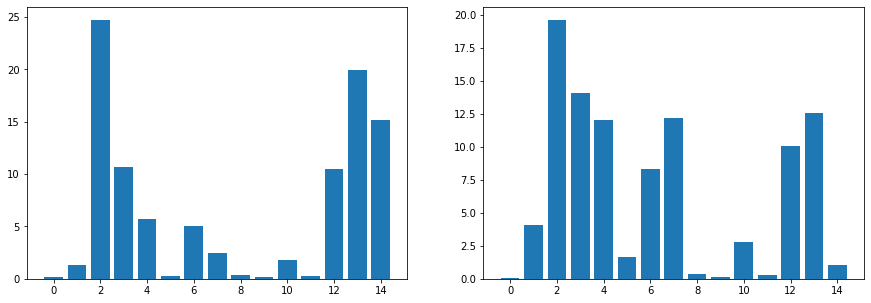

In [46]:
avg_topics_all = get_topics(corpus_all, dictionary_all, corpus_by_year, num_topics=15)

In [42]:
get_largest_popularity_shifts(avg_topics_all, num_topics=10)

2021-04-26 02:00:22,812 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto
2021-04-26 02:00:22,813 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 02:00:22,815 : INFO : setting ignored attribute dispatcher to None
2021-04-26 02:00:22,816 : INFO : setting ignored attribute state to None
2021-04-26 02:00:22,816 : INFO : setting ignored attribute id2word to None
2021-04-26 02:00:22,816 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto', 'datetime': '2021-04-26T02:00:22.816883', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 02:00:22,817 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_4

Top upward shifts in popularity (2019 to 2020)


,0,1,2,3,4,5,6,7,8,9,10,11
1,unit,planned,city,south,power,plant,affirmed,balance,big,base,recovery,limited
2,futures,cents,crude,traders,trading,demand,average,chicago,gas,weather,cut,volume
3,ftse,basic,asian,help,live,indicators,wealth,phone,visit,equity,pages,stocks
4,capital,tax,cash,service,revenue,ratings,term,operating,fiscal,business,state,billion
5,president,united,government,people,time,states,washington,two,state,editing,minister,told


2021-04-26 02:00:22,871 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto
2021-04-26 02:00:22,872 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 02:00:22,873 : INFO : setting ignored attribute dispatcher to None
2021-04-26 02:00:22,874 : INFO : setting ignored attribute state to None
2021-04-26 02:00:22,874 : INFO : setting ignored attribute id2word to None
2021-04-26 02:00:22,874 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto', 'datetime': '2021-04-26T02:00:22.874867', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 02:00:22,875 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_4

Top downward shifts in popularity (2019 to 2020)


,0,1,2,3,4,5,6,7,8,9,10,11
1,diary,ecb,int,events,poll,reserve,swiss,boj,fed,japan,central,federal
2,nasdaq,shares,stock,dow,stocks,trading,points,rose,average,trade,calls,fell
3,metals,codes,commodities,gold,crude,exchange,brent,mtl,cash,paper,gro,european
4,yen,currency,end,gold,dollar,low,next,rose,yield,two,london,around
5,open,close,total,low,securities,notes,due,available,volatility,high,issued,risk


In [47]:
def get_model(corpus_all, dictionary_all, corpus_by_year, num_topics=10, passes=25, iterations=400, 
               eval_every=None, update_every=0, alpha='auto', eta='auto'):
    """
    Get the LDA model 
    
    """
    # Check if a model with the same config already exists. 
    # If it does, load the model instead of generating a new one
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    if os.path.exists(tempfile):
        lda = gensim.models.LdaModel.load(tempfile)
    else:
        lda = generate_lda_model(corpus_all, dictionary_all, num_topics, passes, 
                                 iterations, eval_every, update_every, alpha, eta)
    return lda

lda = get_model(corpus_all, dictionary_all, corpus_by_year, num_topics=15)

topic_word_distribution = lda.get_topics()

df = []
for ind in range(15):
    topic = lda.show_topic(ind, topn=15)
    topicframe = pd.DataFrame(topic).T
    topicframe.index = [ind + 1, ind + 1]
    df.append(topicframe)
    
df = pd.concat(df)

df.to_csv('%s_Topics_15.csv' % THEME)


yearly_topic_avg_probabilities = pd.DataFrame(avg_topics_all).T

yearly_topic_avg_probabilities.index += 1

yearly_topic_avg_probabilities.columns = [START_YEAR + i for i in range(25)]

yearly_topic_avg_probabilities.to_csv('%s_Average_Topic_Probabilities_Per_Year.csv' % THEME)

2021-04-26 10:49:44,143 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_15_25_400_auto_auto
2021-04-26 10:49:44,145 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_15_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 10:49:44,147 : INFO : setting ignored attribute dispatcher to None
2021-04-26 10:49:44,148 : INFO : setting ignored attribute state to None
2021-04-26 10:49:44,149 : INFO : setting ignored attribute id2word to None
2021-04-26 10:49:44,150 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_15_25_400_auto_auto', 'datetime': '2021-04-26T10:49:44.150117', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 10:49:44,150 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_15_25_4